In [1]:
from sklearn import datasets
import pandas as pd
import numpy as npy
from matplotlib import pyplot as plt
import seaborn as sns
from random import randint
import math

In [2]:
# From sklearn.datasets, we loaded the iris data set here
iris=datasets.load_iris()

In [10]:
# We created a DataFrama object from the iris dataset named df_iris. Then displayed it on a tabular format
df_iris=pd.DataFrame(data=npy.c_[iris['data'],iris['target']],columns=iris['feature_names']+['Species'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Step 1:  2D Plot (scatter plot)  of the Iris flower data instances based on the two features of each flower: Sepal Width and Sepal Length.

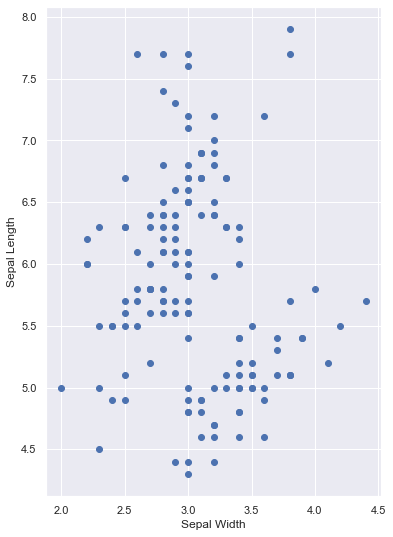

In [11]:
#We placed the data in the df_iris data frame object to a scatter plot
sns.set(color_codes=True)
fig0=plt.figure(figsize=(6,9))
ax0=fig0.add_subplot(1,1,1)
ax0.scatter(df_iris['sepal width (cm)'],df_iris['sepal length (cm)'])
plt.xlabel('Sepal Width');
plt.ylabel('Sepal Length');

# Step 2: Color coded plot of each data instance we had at Step 1. 

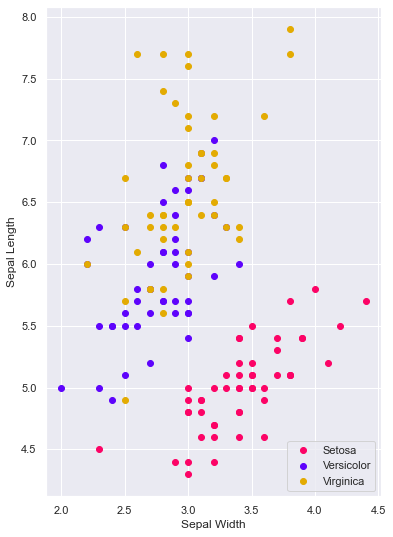

In [12]:
#This time we first sliced our data frame to new data frames containing distinct species of iris flower. Then scattered these
#three data frames on a scatter plot enabling coloring for each group 
fig=plt.figure(figsize=(6,9))
ax=fig.add_subplot(1,1,1)
df_setosa=df_iris[df_iris['Species']==0.0]
df_versicolor=df_iris[df_iris['Species']==1.0]
df_virginica=df_iris[df_iris['Species']==2.0]
ax.scatter(df_setosa['sepal width (cm)'],df_setosa['sepal length (cm)'],c='#fc0366',label='Setosa')
ax.scatter(df_versicolor['sepal width (cm)'],df_versicolor['sepal length (cm)'],c='#5e03fc',label='Versicolor')
ax.scatter(df_virginica['sepal width (cm)'],df_virginica['sepal length (cm)'],c='#e3ab02',label='Virginica')
ax.legend(loc='best')
plt.xlabel('Sepal Width');
plt.ylabel('Sepal Length');

# Step 3: Plot of the initial random cluster centers for k=3 on the scatter plot that we had at Step 1

   sepal width (cm)  sepal length (cm)
0          4.219477           4.932403
1          3.333325           5.594850
2          3.685373           7.809863


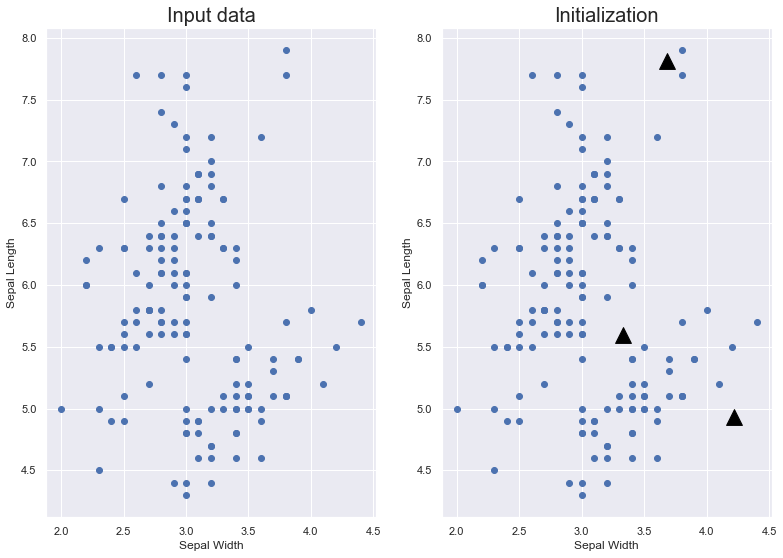

In [13]:
#In this cell; with the help of self-defined find_centers() method we created random initial centers list providing that these 
#points are inside the boundries of existing iris flower data. Then first plotted the input data and second displayed the
#initial centers on the input data.
minvalues = (df_iris[['sepal width (cm)','sepal length (cm)']].min()).to_numpy()
maxvalues = (df_iris[['sepal width (cm)','sepal length (cm)']].max()).to_numpy()
def find_centers(k,wmin,wmax,lmin,lmax):
        array = []
        i=0
        while i<k:
            x=(npy.random.uniform(wmin,wmax))
            y=(npy.random.uniform(lmin,lmax))
            array_couples= [x,y]
            array.append(array_couples)
            i +=1
        return array 
fig_ii=plt.figure(figsize=(13,9))
axi1=fig_ii.add_subplot(1,2,1)
axi1.scatter(df_iris['sepal width (cm)'],df_iris['sepal length (cm)'])
plt.title('Input data',fontsize=20)
plt.xlabel('Sepal Width');
plt.ylabel('Sepal Length');
cluster=3
initial_centers=npy.array(find_centers(cluster,minvalues[0],maxvalues[0],minvalues[1],maxvalues[1]))

df_centers=pd.DataFrame(initial_centers,columns=['sepal width (cm)','sepal length (cm)'])

axi2=fig_ii.add_subplot(1,2,2)
axi2.set_title('Initialization',fontsize=20)
axi2.scatter(df_iris['sepal width (cm)'],df_iris['sepal length (cm)'])
axi2.scatter(df_centers['sepal width (cm)'],df_centers['sepal length (cm)'],s=250,c="black",marker='^')
axi2.set_xlabel('Sepal Width')
axi2.set_ylabel('Sepal Length')
plt.show()
plt.close()

In [14]:
colors=['#fc0366','#5e03fc','#e3ab02','#0d9dbd','#9e1919','#80a125','#1b1d8f','#e6de00']
#finds the clusters that points are belong to.
def find_groups(df_iris,df_centers):
    groups=[]
    for index in range(150):
        distance=4.8
        belongs_to=-1
        for i in range(cluster):
            x=math.sqrt((df_iris.loc[index,'sepal width (cm)']-df_centers.loc[i,'sepal width (cm)'])**2+
                        (df_iris.loc[index,'sepal length (cm)']-df_centers.loc[i,'sepal length (cm)'])**2)
            if(x<distance):
                distance=x
                belongs_to=i
        groups.append([df_iris.loc[index,'sepal width (cm)'],df_iris.loc[index,'sepal length (cm)'],belongs_to])
    return groups

#creates the list of average sepal widths for clusters
def av_sepW_list(df_assignments):
    w_list=[]
    for i in range(cluster):
        sum=0
        for j in range(len(df_assignments.loc[i,0])):
            sum+=df_assignments.loc[i,0][j][0]
        w_list.append(sum/len(df_assignments.loc[i,0]))
    return w_list

#creates the list of average sepal lengths for clusters
def av_sepL_list(df_assignments):
    l_list=[]
    for i in range(cluster):
        sum=0
        for j in range(len(df_assignments.loc[i,0])):
            sum+=df_assignments.loc[i,0][j][1]
        l_list.append(sum/len(df_assignments.loc[i,0]))
    return l_list

#Stores the data grouped by closest centers(clusters) in the form of Numpy array and then transfers this data creating a 
#DataFrame object named df_assignments. Later, adds all these clusters and the centers to a scatterplot in a nested for loop.
#In the next step, calculates the new cluster centers with the help of av_sepW_list() and av_sepL_list() methods in an array 
#format. Using these arrays in dictionary and then creating a DataFrame object from this dictionary we obtain df_new_centers.
#Once again adds all these clusters and the new centers to a scatterplot in a nested for loop.
def assign_and_recompute(df_assignment1,df_centers,x):
    fig_double=plt.figure(figsize=(13,9))
    ax2=fig_double.add_subplot(1,2,1)
    assignments=[]
    for i in range(cluster):
        assignments.append(npy.array(df_assignment1[df_assignment1['group']==i],dtype=object))
    df_assignments=pd.DataFrame(assignments)
   
    for i in range(cluster):
        for j in range(len(df_assignments.loc[i,0])):
            ax2.scatter((df_assignments.loc[i,0])[j][0],(df_assignments.loc[i,0])[j][1],c=colors[i],label=str((df_assignments.loc[i,0])[j][2]))
        
    ax2.scatter(df_centers['sepal width (cm)'],df_centers['sepal length (cm)'],s=250,c='black',marker='^')
    ax2.set_title(('Assign Points'+'('+str(x)+')'),fontsize=20)
    plt.xlabel('Sepal Width');
    plt.ylabel('Sepal Length');
    
    new_centers={'sepal width (cm)':av_sepW_list(df_assignments),
                 'sepal length (cm)':av_sepL_list(df_assignments)}
    df_new_centers=pd.DataFrame(new_centers)
    ax3=fig_double.add_subplot(1,2,2)
    for i in range(cluster):
        for j in range(len(df_assignments.loc[i,0])):
            ax3.scatter((df_assignments.loc[i,0])[j][0],(df_assignments.loc[i,0])[j][1],c=colors[i],label=str((df_assignments.loc[i,0])[j][2]))
        
    ax3.scatter(df_new_centers['sepal width (cm)'],df_new_centers['sepal length (cm)'],s=250,c="black",marker='^')
    ax3.set_title(('Recompute Centers'+'('+str(x)+')'),fontsize=20)
    plt.xlabel('Sepal Width');
    plt.ylabel('Sepal Length');
    plt.show()
    plt.close()
    return df_new_centers

# Step 4: Plots, similar to Step 3, this time with new cluster centers for each iteration of the k-means algorithm until it converges.

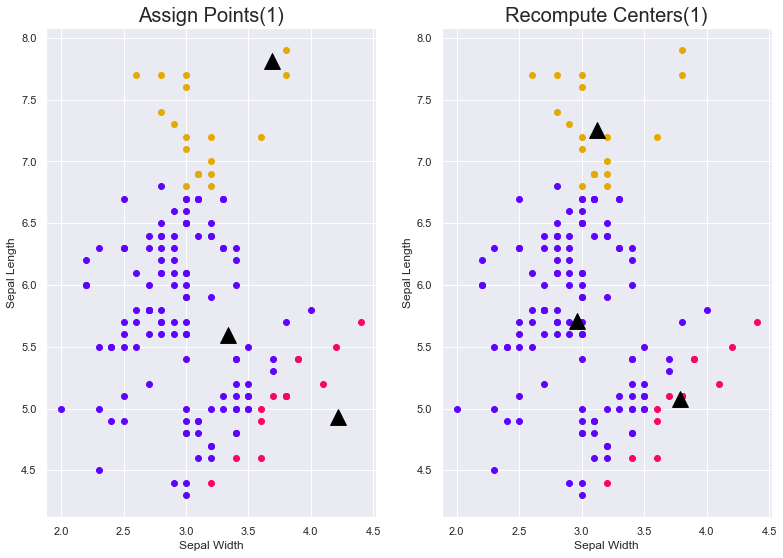

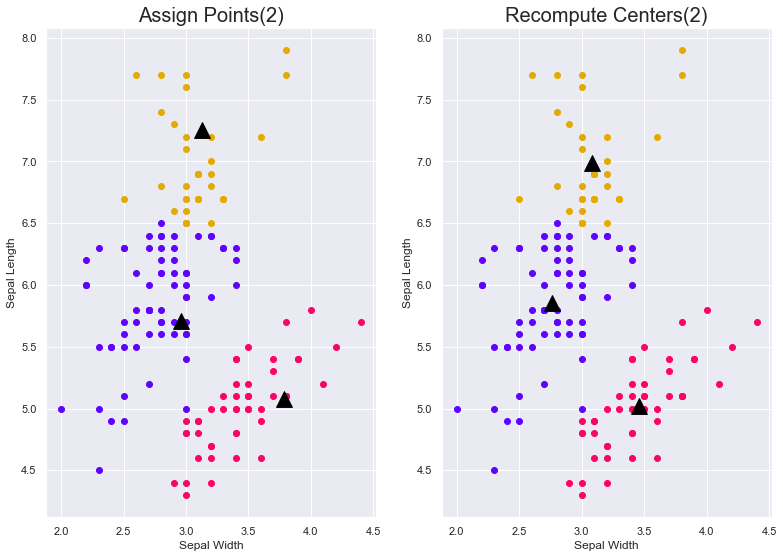

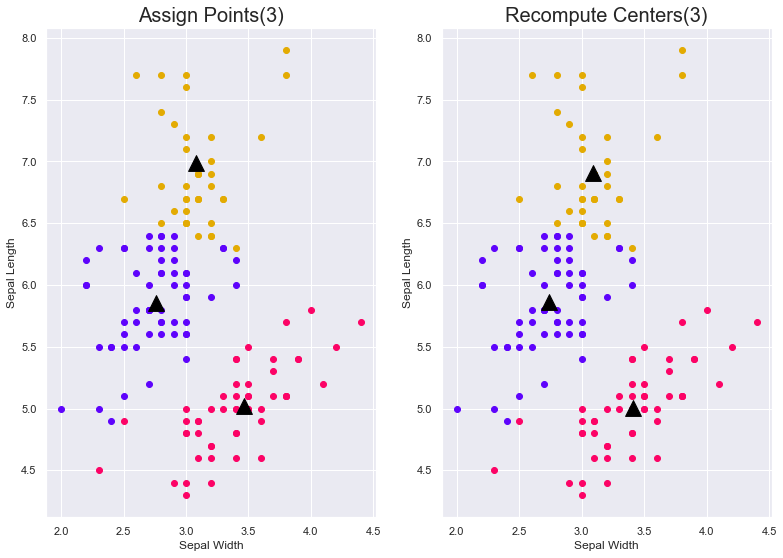

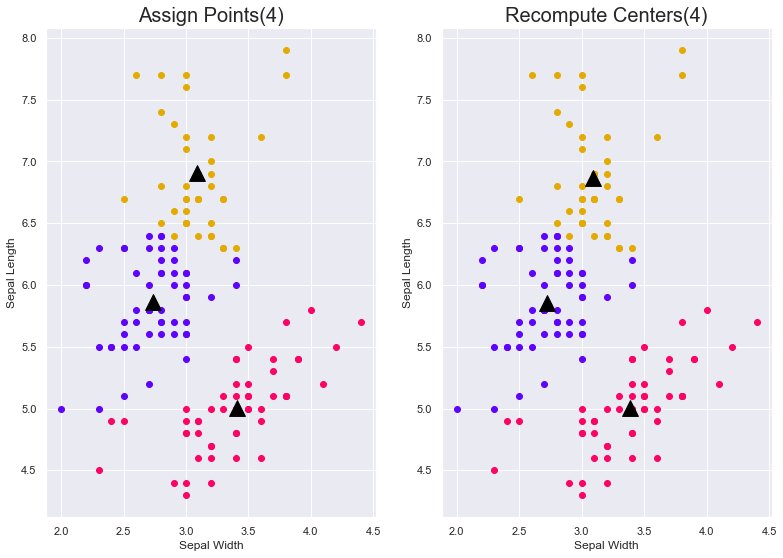

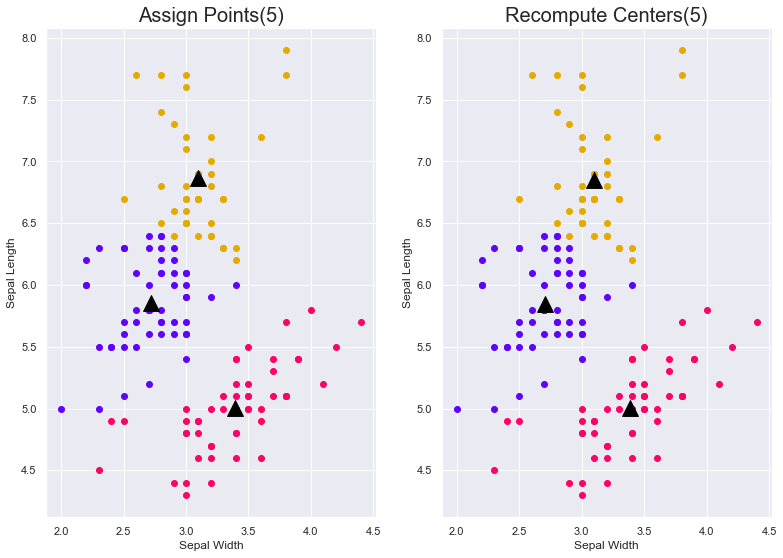

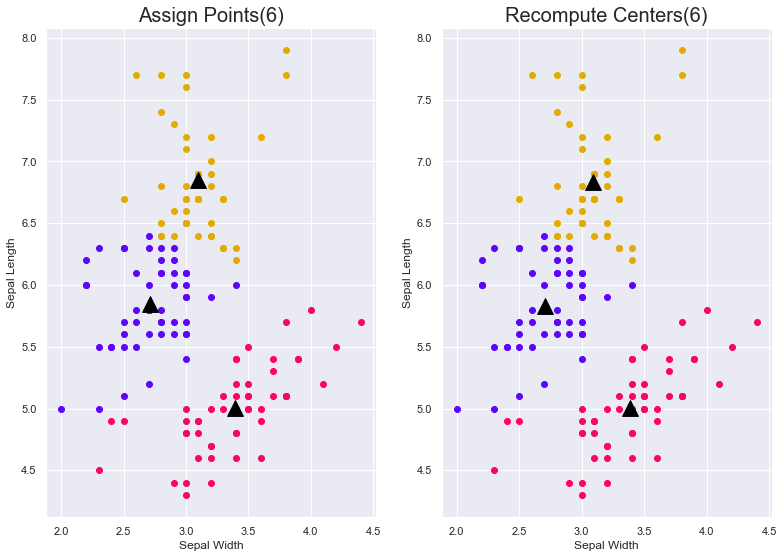

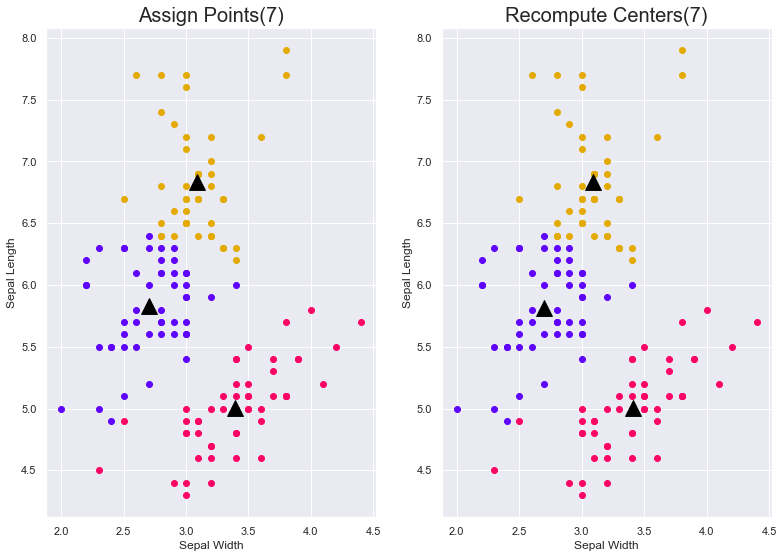

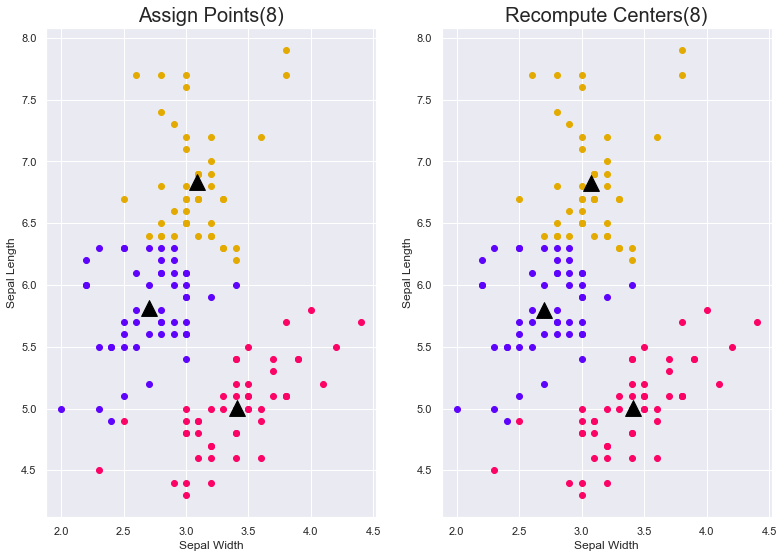

In [15]:
#In this cell first we assigned the initial groups to groups_first variable found with find_groups() method.
#Then in a while loop we called assign_and_recompute() method to display the scatterplot for assign points and recompute
#centers phases of the current step. Inside the loop with an if statement we checked if the convergence happened. If happened 
#changing the exit variable to True we ensured that the iteration will end; else we assigned the groups variable holding the 
#yhe new groups to groups_first variable and new centers to df_centers to make sure that the iteration goes on accurately.
exit=False
groups_first=find_groups(df_iris,df_centers)
i=1
while(exit==False):
    df_assignment1=pd.DataFrame(groups_first, columns=['sepal width (cm)','sepal length (cm)','group'])
    df_new_centers=assign_and_recompute(df_assignment1,df_centers,i)
    groups=find_groups(df_iris, df_new_centers)
    if groups_first==groups:
        exit=True
    else:
        groups_first=groups
        df_centers=df_new_centers
        i+=1

# Step 5: The plot we had at Step 2 and the plot we acquired at the last iteration of our k-means algorithm at Step 4 (after it converges) together side by side in the same plot. 

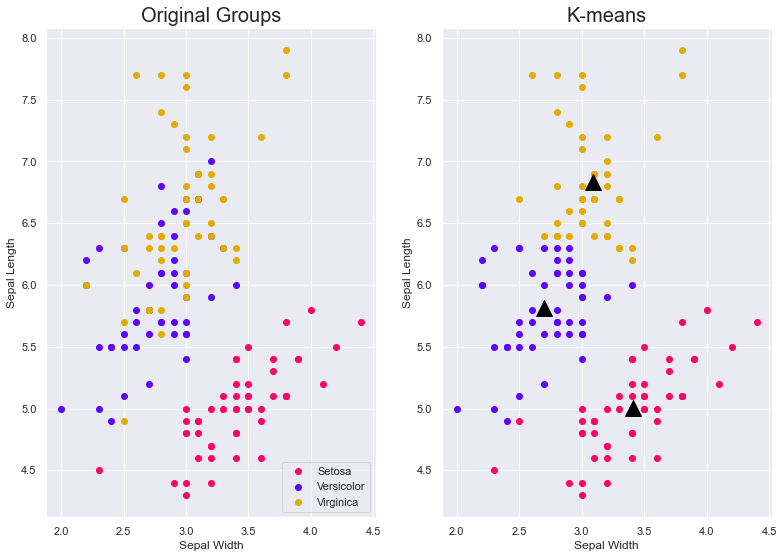

In [16]:
#In this last step, on subplots of a scatter plot we displayed the original groups as we did in the second step and the
#acquired clusters found on the last iteration of the k-means.
fig_last=plt.figure(figsize=(13,9))
ax_last1=fig_last.add_subplot(1,2,1)
ax_last2=fig_last.add_subplot(1,2,2)
ax_last1.scatter(df_setosa['sepal width (cm)'],df_setosa['sepal length (cm)'],c='#fc0366',label='Setosa')
ax_last1.scatter(df_versicolor['sepal width (cm)'],df_versicolor['sepal length (cm)'],c='#5e03fc',label='Versicolor')
ax_last1.scatter(df_virginica['sepal width (cm)'],df_virginica['sepal length (cm)'],c='#e3ab02',label='Virginica')
ax_last1.legend(loc='best')
ax_last1.set_title('Original Groups',fontsize=20)
ax_last1.set_xlabel('Sepal Width');
ax_last1.set_ylabel('Sepal Length');

assignments=[]
for i in range(cluster):
    assignments.append(npy.array(df_assignment1[df_assignment1['group']==i],dtype=object))
df_assignments=pd.DataFrame(assignments)
for i in range(cluster):
     for j in range(len(df_assignments.loc[i,0])):
        ax_last2.scatter((df_assignments.loc[i,0])[j][0],(df_assignments.loc[i,0])[j][1],c=colors[i],label=str((df_assignments.loc[i,0])[j][2]))
        
ax_last2.scatter(df_centers['sepal width (cm)'],df_centers['sepal length (cm)'],s=250,c='black',marker='^')
ax_last2.set_title('K-means',fontsize=20)
ax_last2.set_xlabel('Sepal Width');
ax_last2.set_ylabel('Sepal Length');


# Discussion about the plots above
__For Setosa we can say that we have acquired a quite accurate cluster. However, it is not possible to say the same thing for Versicolor and Virginica species. These two species are intertwined as it can be seen on the original color coded version of the species subplot. There is not a distinctive seperation between Versicolor and Virginica. This fact disables us from obtaining an accurate result. Because, clustering does not work to distinguish the intertwined scatterpoints. On the other hand, for discrete data like Setosa, k-means clustering is a good approach for classification.__